<a href="https://colab.research.google.com/github/Jarnoesse/IA-AGN-with-ML/blob/main/Data_exploration_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u

import seaborn as sns

Download of the dataset and separation of the different sources

In [54]:
table_RACS_catalogue_URL = 'http://oal.ul.pt/data/AlmaQA2/Catalogs_cV1ax509ZbXXx978pb3/RACS_VEXAS_ALLWISE_DES_PS1_SkyMapper_specZ_milliquas_v3.fits.gz'
table_RACS_cat = Table.read(table_RACS_catalogue_URL)

table_RACS_cat_df = table_RACS_cat.to_pandas() # convert to Pandas Dataframe

In [103]:
attributes = ["MAG_AUTO_G_DES","MAG_AUTO_R_DES","MAG_AUTO_I_DES","MAG_AUTO_Z_DES","MAG_AUTO_Y_DES","z_spec_1","spec_class_1"]
DES_df = table_RACS_cat_df[attributes].copy()

attributes = ["GPETMAG_PS","RPETMAG_PS","IPETMAG_PS","ZPETMAG_PS","YPETMAG_PS","z_spec_2","class_2_2"]
PS_df = table_RACS_cat_df[attributes].copy()

attributes = ["U_PETRO_SM","V_PETRO_SM","G_PETRO_SM","R_PETRO_SM","I_PETRO_SM","Z_PETRO_SM","z_spec_3","spec_class_3"]
SM_df = table_RACS_cat_df[attributes].copy()


In [111]:
DES_df  = DES_df[DES_df["spec_class_1"]>=0]

PS_df = PS_df[PS_df["class_2_2"]>=0]

SM_df = SM_df[SM_df["spec_class_3"] == 0]

In [104]:
DES_df_0 = DES_df[DES_df["spec_class_1"] == 0]
DES_df_1 = DES_df[DES_df["spec_class_1"] == 1]
DES_df_2 = DES_df[DES_df["spec_class_1"] == 2]

PS_df_0 = PS_df[PS_df["class_2_2"] == 0]
PS_df_1 = PS_df[PS_df["class_2_2"] == 1]
PS_df_2 = PS_df[PS_df["class_2_2"] == 2]

SM_df_0 = SM_df[SM_df["spec_class_3"] == 0]
SM_df_1 = SM_df[SM_df["spec_class_3"] == 1]
SM_df_2 = SM_df[SM_df["spec_class_3"] == 2]

In [89]:
DES_df.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12157 entries, 2 to 259245
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MAG_AUTO_G_DES  12157 non-null  float32
 1   MAG_AUTO_R_DES  12157 non-null  float32
 2   MAG_AUTO_I_DES  12157 non-null  float32
 3   MAG_AUTO_Z_DES  12157 non-null  float32
 4   MAG_AUTO_Y_DES  12157 non-null  float32
 5   z_spec_1        12157 non-null  float64
 6   spec_class_1    12157 non-null  Int16  
dtypes: Int16(1), float32(5), float64(1)
memory usage: 463.0 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03f4bb45d0>,
      dtype=object)

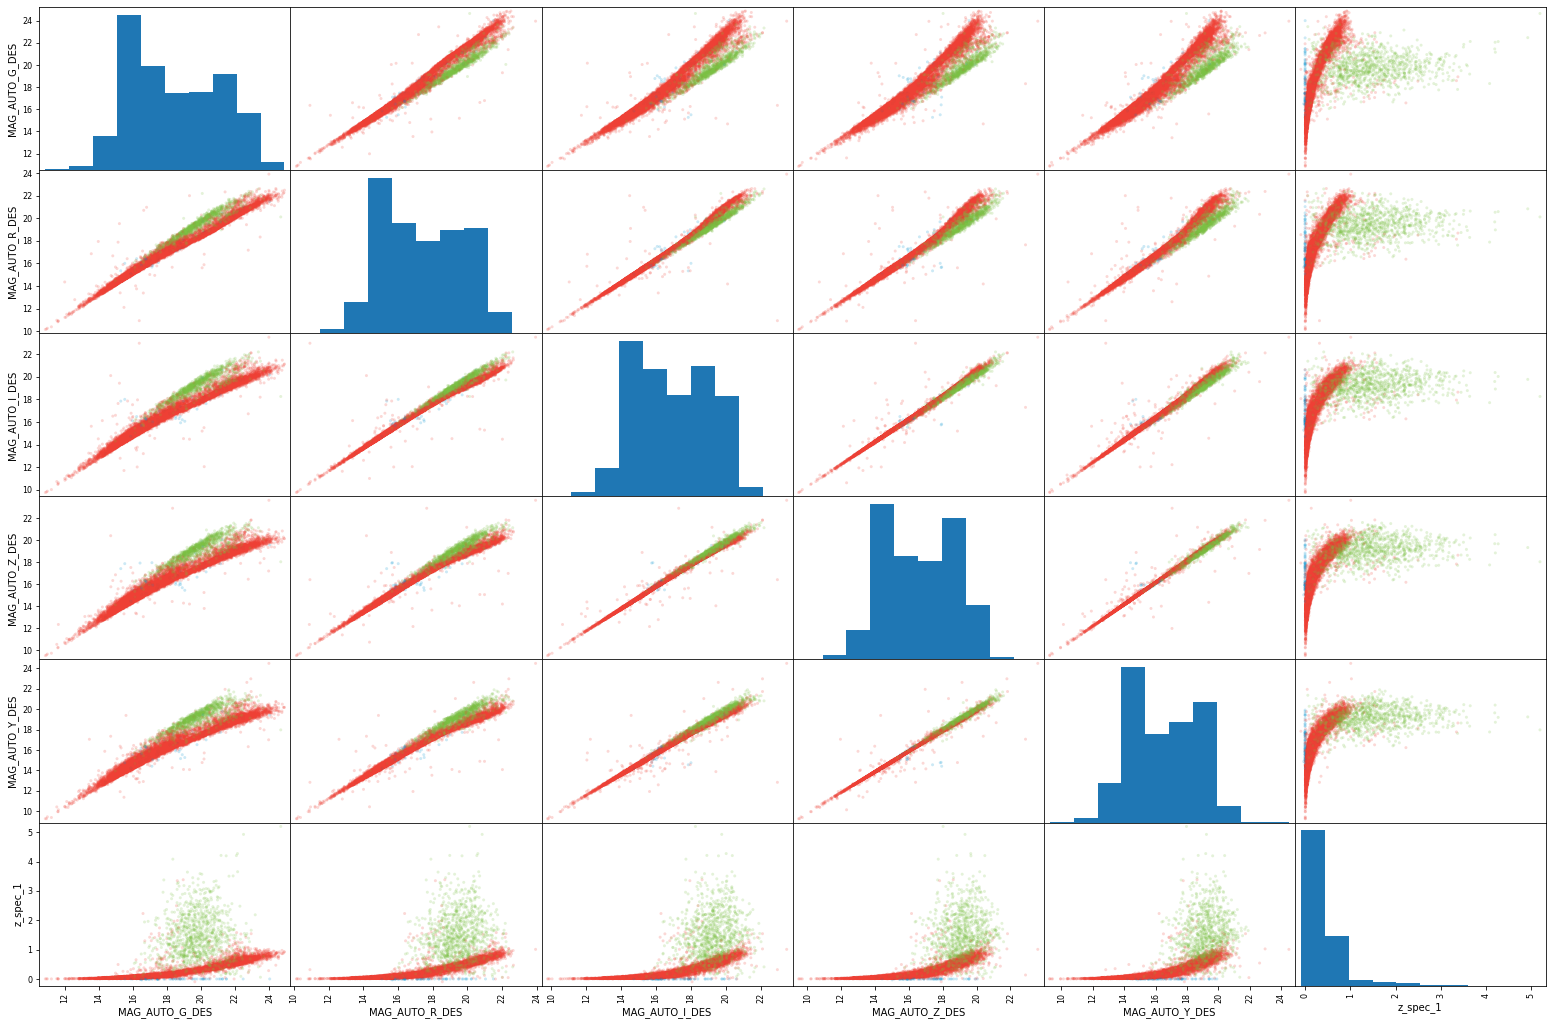

In [66]:
attributes = ["MAG_AUTO_G_DES","MAG_AUTO_R_DES","MAG_AUTO_I_DES","MAG_AUTO_Z_DES","MAG_AUTO_Y_DES","z_spec_1"]

color_wheel = {0: "#0392cf", #blue Star
               1: "#7bc043", #green AGN
               2: "#ee4035"} #red Galaxy

colors = DES_df["spec_class_1"].map(lambda x: color_wheel.get(x))

scatter_matrix(DES_df[attributes],color = colors,alpha = 0.2, figsize=(27,18))

In [83]:
PS_df

,GPETMAG_PS,RPETMAG_PS,IPETMAG_PS,ZPETMAG_PS,YPETMAG_PS,IPSFMAG_PS,z_spec_2,class_2_2
1,15.941400,15.413200,15.260400,15.092500,14.890800,16.674900,0.082210,2
2,16.163799,15.585900,15.328400,15.168600,14.653500,17.185166,0.062222,2
3,16.637300,16.535601,16.650400,16.141500,15.974600,16.711039,0.392060,2
4,19.993900,20.211300,20.043501,19.764500,20.200899,19.978659,2.366051,1
5,19.777300,18.771099,18.331699,17.927900,17.819201,19.282002,0.271035,2
...,...,...,...,...,...,...,...,...
259233,18.532200,18.446199,18.419001,18.240999,18.137199,18.288798,2.629645,1
259235,13.802200,13.586000,11.019500,13.312600,12.219300,15.715879,0.033990,2
259236,21.253700,21.582800,20.936800,20.098900,20.440599,21.239902,0.195315,1
259241,19.042500,18.805700,18.977900,18.801001,18.400801,18.852815,0.962628,1


In [98]:
PS_df.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12711 entries, 1 to 259245
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GPETMAG_PS  12711 non-null  float32
 1   RPETMAG_PS  12711 non-null  float32
 2   IPETMAG_PS  12711 non-null  float32
 3   ZPETMAG_PS  12711 non-null  float32
 4   YPETMAG_PS  12711 non-null  float32
 5   z_spec_2    12711 non-null  float64
 6   class_2_2   12711 non-null  Int16  
dtypes: Int16(1), float32(5), float64(1)
memory usage: 484.1 KB


I had to drop IPSFMAG_PS because of shorter dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03f1067950>,
      dtype=object)

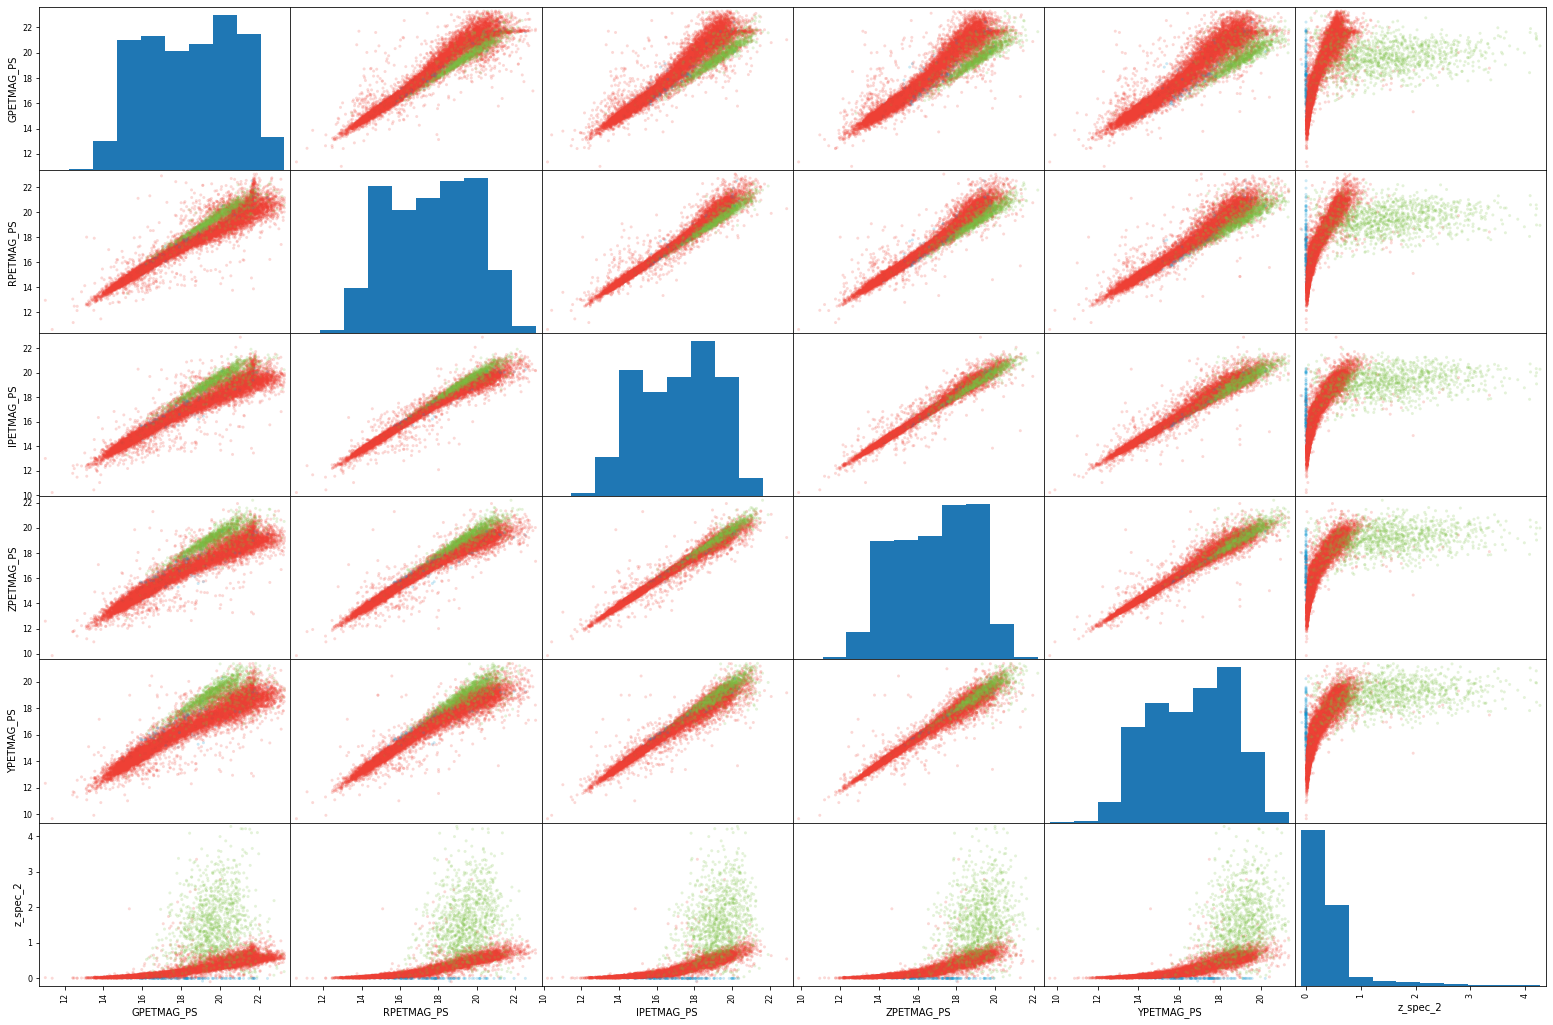

In [99]:
attributes = ["GPETMAG_PS","RPETMAG_PS","IPETMAG_PS","ZPETMAG_PS","YPETMAG_PS","z_spec_2",]

color_wheel = {0: "#0392cf", #blue Star
               1: "#7bc043", #green AGN
               2: "#ee4035"} #red Galaxy

colors = PS_df["class_2_2"].map(lambda x: color_wheel.get(x))

scatter_matrix(PS_df[attributes],color = colors,alpha = 0.2, figsize=(27,18))

In [115]:
SM_df

,U_PETRO_SM,V_PETRO_SM,G_PETRO_SM,R_PETRO_SM,I_PETRO_SM,Z_PETRO_SM,z_spec_3,spec_class_3
314,18.138901,17.743000,16.799000,16.612000,16.510000,16.475000,0.000410,0
1983,18.637300,NaN,18.046301,18.566999,18.107000,17.521000,0.000036,0
2625,19.070499,NaN,18.639200,18.527000,18.306700,18.580000,0.000053,0
2633,18.667700,NaN,17.673700,17.378099,17.507999,17.082001,-0.000045,0
2653,16.822001,16.719000,15.222000,14.937000,14.651000,14.603000,-0.000450,0
...,...,...,...,...,...,...,...,...
258033,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
258191,18.368601,NaN,18.025999,17.700001,17.854000,18.039000,-0.000340,0
258448,18.488199,NaN,18.243999,17.756001,17.448000,17.606001,0.000050,0
258497,16.868999,16.573999,15.679000,15.524000,15.455000,15.528000,0.000370,0


In [113]:
SM_df.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 314 to 259145
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   U_PETRO_SM    180 non-null    float32
 1   V_PETRO_SM    48 non-null     float64
 2   G_PETRO_SM    180 non-null    float32
 3   R_PETRO_SM    180 non-null    float32
 4   I_PETRO_SM    180 non-null    float32
 5   Z_PETRO_SM    180 non-null    float32
 6   z_spec_3      208 non-null    float64
 7   spec_class_3  208 non-null    Int16  
dtypes: Int16(1), float32(5), float64(2)
memory usage: 9.5 KB


ValueError: ignored

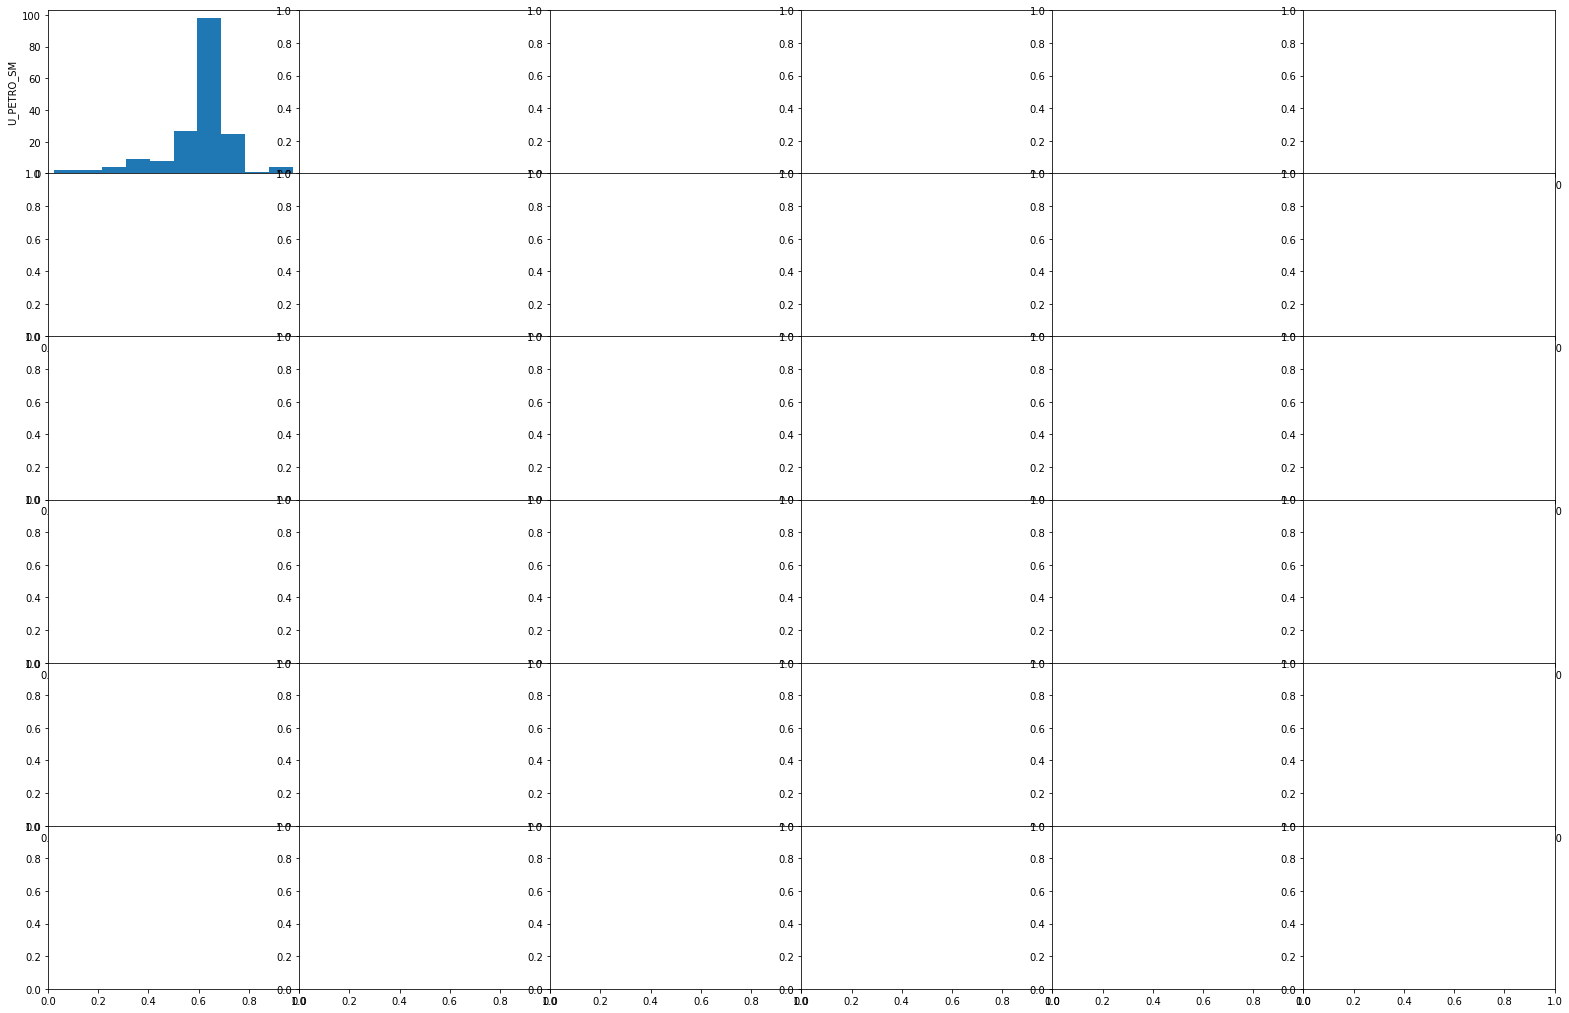

In [114]:
attributes = ["U_PETRO_SM","G_PETRO_SM","R_PETRO_SM","I_PETRO_SM","Z_PETRO_SM","z_spec_3"]

color_wheel = {0: "#0392cf", #blue
               1: "#7bc043", #green
               2: "#ee4035"} #red

colors = SM_df["spec_class_3"].map(lambda x: color_wheel.get(x))

scatter_matrix(SM_df[attributes],alpha = 0.2,color=colors, figsize=(27,18)) #MISPLACED NAN?